In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
monthfile='MERRA2_2016_tavg1_2d_aer_Nx_M2T1NXAER_ctio_11.csv'
yearfile='MERRA2_2016_tavg1_2d_aer_Nx_M2T1NXAER_ctio_AllYear.csv'

In [4]:
df_month=pd.read_csv(monthfile)

In [5]:
df_year=pd.read_csv(yearfile)

In [6]:
df_month.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,720.000000,720.000000,720.000000
mean,1.319992,0.053532,0.050035
std,0.096633,0.021126,0.020643
min,1.028973,0.018895,0.016767
25%,1.264401,0.037872,0.034969
50%,1.322928,0.050067,0.046491
75%,1.383139,0.063408,0.059464
max,1.556037,0.165293,0.159976


In [54]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

In [55]:
exct_aer_month=df_month["TOTEXTTAU"]

In [56]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(exct_aer_month)

In [57]:
print themean_m, thestd_m, thevariation_m

0.053 0.021 39.0


In [58]:
title = "Monthly variation of Aerosols extinctions (nov 2016), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

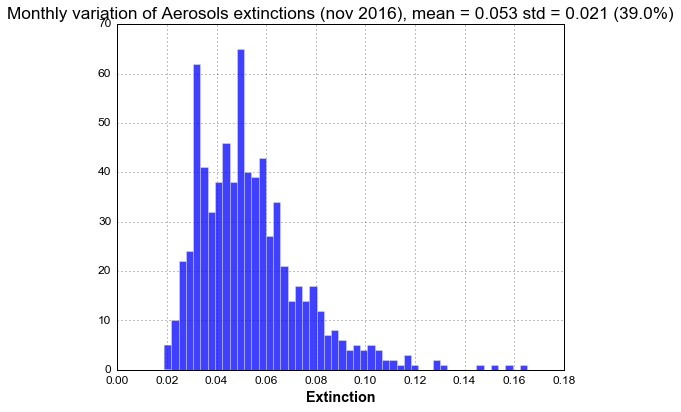

In [59]:
n, bins, patches = plt.hist(exct_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2016_11.pdf')

In [60]:
ang_aer_month=df_month["TOTANGSTR"]

In [61]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(ang_aer_month)

In [62]:
print themean_m, thestd_m, thevariation_m

1.319 0.096 7.0


In [63]:
title = "Monthly variation of Angstrom exponent Aerosols (nov 2016), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

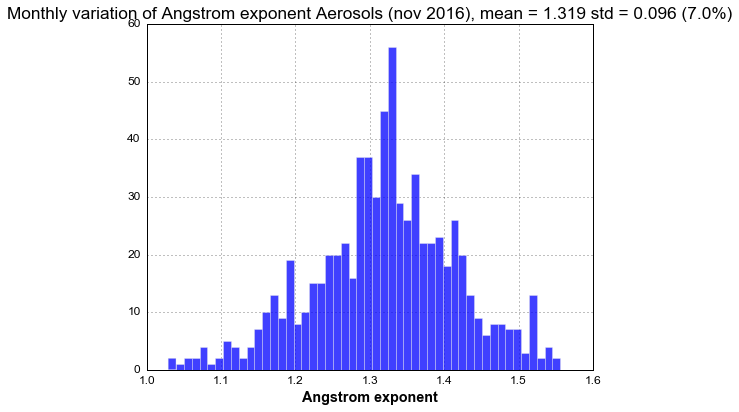

In [64]:
n, bins, patches = plt.hist(ang_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2016_11.pdf')

In [65]:
exct_aer_year=df_year["TOTEXTTAU"]

In [67]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(exct_aer_month)

In [68]:
title = "Yearly variation of Aerosols extinctions, mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

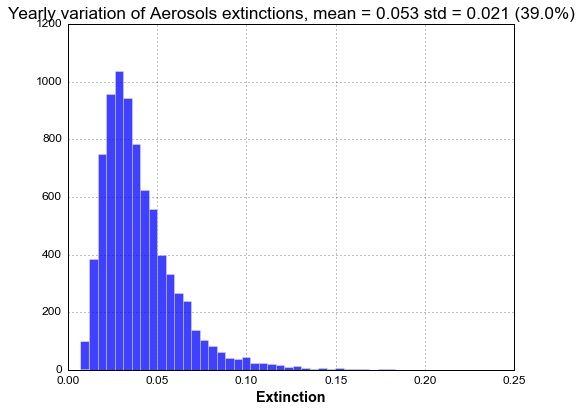

In [69]:
n, bins, patches = plt.hist(exct_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2016_year.pdf')

In [70]:
ang_aer_year=df_year["TOTANGSTR"]

In [71]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(ang_aer_year)

In [72]:
title = "Yearly variation of Angstrom exponent Aerosols (2016), mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

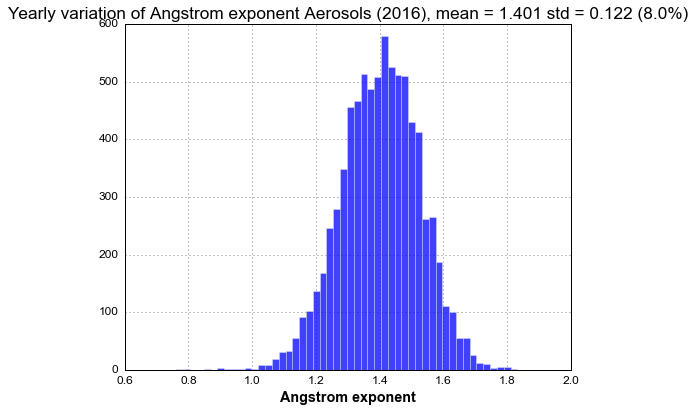

In [73]:
n, bins, patches = plt.hist(ang_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2016_year.pdf')